In [294]:
import pandas as pd

## 1. Sort a DataFrame or a Series

In [296]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('./data-basics/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


**Note:** None of the sorting methods below affect the underlying data. (In other words, the sorting is temporary).

In [298]:
# sort the 'title' Series in ascending order (returns a Series)
movies.title.sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [300]:
# sort in descending order instead
movies.title.sort_values(ascending=False).head()

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html) for a **Series**. (Prior to version 0.17, use [**`order`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.order.html) instead.)

In [302]:
# sort the entire DataFrame by the 'title' Series (returns a DataFrame)
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [304]:
# sort in descending order instead
movies.sort_values('title', ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
864,7.5,[Rec],R,Horror,78,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."


Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) for a **DataFrame**. (Prior to version 0.17, use [**`sort`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.sort.html) instead.)

In [306]:
# sort the DataFrame first by 'content_rating', then by 'duration'
movies.sort_values(['content_rating', 'duration']).head()

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."


[Summary of changes to the sorting API](http://pandas.pydata.org/pandas-docs/stable/whatsnew.html#changes-to-sorting-api) in pandas 0.17

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 2. Filter rows of a DataFrame by column value

In [308]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('./data-basics/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [310]:
# examine the number of rows and columns
movies.shape

(979, 6)

**Goal:** Filter the DataFrame rows to only show movies with a 'duration' of at least 200 minutes.

In [312]:
# create a list in which each element refers to a DataFrame row: True if the row satisfies the condition, False otherwise
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [314]:
# confirm that the list has the same length as the DataFrame
len(booleans)

979

In [316]:
# examine the first five list elements
booleans[0:5]

[False, False, True, False, False]

In [318]:
# convert the list to a Series
is_long = pd.Series(booleans)
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [320]:
# use bracket notation with the boolean Series to tell the DataFrame which rows to display
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [322]:
# simplify the steps above: no need to write a for loop to create 'is_long' since pandas will broadcast the comparison
is_long = movies.duration >= 200
movies[is_long]

# or equivalently, write it in one line (no need to create the 'is_long' object)
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [324]:
# select the 'genre' Series from the filtered DataFrame
movies[movies.duration >= 200].genre

# or equivalently, use the 'loc' method
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 3. Apply multiple filter criteria to a DataFrame

In [326]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('./data-basics/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [328]:
# filter the DataFrame to only show movies with a 'duration' of at least 200 minutes
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


Understanding **logical operators:**

- **`and`**: True only if **both sides** of the operator are True
- **`or`**: True if **either side** of the operator is True

In [330]:
# demonstration of the 'and' operator
print(True and True)
print(True and False)
print(False and False)

True
False
False


In [332]:
# demonstration of the 'or' operator
print(True or True)
print(True or False)
print(False or False)

True
True
False


Rules for specifying **multiple filter criteria** in pandas:

- use **`&`** instead of **`and`**
- use **`|`** instead of **`or`**
- add **parentheses** around each condition to specify evaluation order

**Goal:** Further filter the DataFrame of long movies (duration >= 200) to only show movies which also have a 'genre' of 'Drama'

In [334]:
# CORRECT: use the '&' operator to specify that both conditions are required
movies[(movies.duration >=200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [336]:
# INCORRECT: using the '|' operator would have shown movies that are either long or dramas (or both)
movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


**Goal:** Filter the original DataFrame to show movies with a 'genre' of 'Crime' or 'Drama' or 'Action'

In [338]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


Documentation for [**`isin`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html)

## 4. Use "groupby"

In [340]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('./data-basics/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [342]:
# calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()

106.16062176165804

In [344]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [346]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

Documentation for [**`groupby`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [348]:
# other aggregation functions (such as 'max') can also be used with groupby
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [350]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


Documentation for [**`agg`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [352]:
# specifying a column to which the aggregation function should be applied is not required
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [354]:
# allow plots to appear in the notebook
%matplotlib inline

<AxesSubplot:xlabel='continent'>

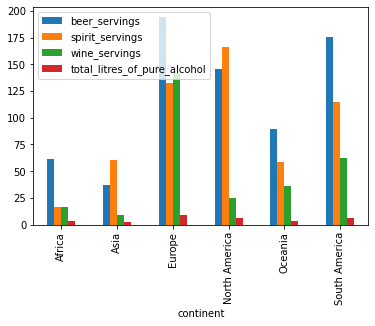

In [356]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 5. Explore a Series

In [358]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('./data-basics/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [360]:
# examine the data type of each Series
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

**Exploring a non-numeric Series:**

In [362]:
# count the non-null values, unique values, and frequency of the most common value
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html)

In [364]:
# count how many times each value in the Series occurs
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [366]:
# display percentages instead of raw counts
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [368]:
# 'value_counts' (like many pandas methods) outputs a Series
type(movies.genre.value_counts())

pandas.core.series.Series

In [370]:
# thus, you can add another Series method on the end
movies.genre.value_counts().head()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: genre, dtype: int64

In [372]:
# display the unique values in the Series
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [374]:
# count the number of unique values in the Series
movies.genre.nunique()

16

Documentation for [**`unique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) and [**`nunique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html)

In [376]:
# compute a cross-tabulation of two Series
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


Documentation for [**`crosstab`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

**Exploring a numeric Series:**

In [378]:
# calculate various summary statistics
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [380]:
# many statistics are implemented as Series methods
movies.duration.mean()

120.97957099080695

Documentation for [**`mean`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)

In [382]:
# 'value_counts' is primarily useful for categorical data, not numerical data
movies.duration.value_counts().head()

112    23
113    22
101    20
102    20
129    19
Name: duration, dtype: int64

In [384]:
# allow plots to appear in the notebook
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

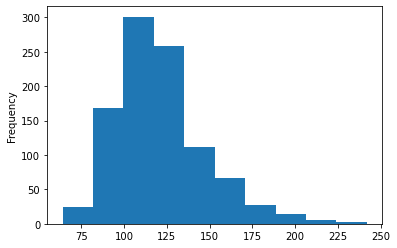

In [386]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot(kind='hist')

<AxesSubplot:>

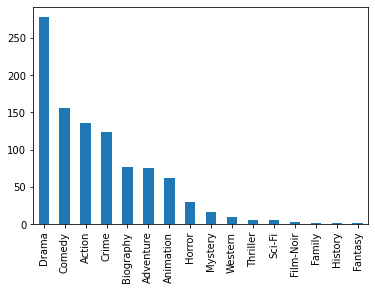

In [388]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 6. Handle missing values

In [390]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('./data-basics/ufo.csv')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


**What does "NaN" mean?**

- "NaN" is not a string, rather it's a special value: **`numpy.nan`**.
- It stands for "Not a Number" and indicates a **missing value**.
- **`read_csv`** detects missing values (by default) when reading the file, and replaces them with this special value.

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [392]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [394]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [**`notnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html)

In [396]:
# count the number of missing values in each Series
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

This calculation works because:

1. The **`sum`** method for a DataFrame operates on **`axis=0`** by default (and thus produces column sums).
2. In order to add boolean values, pandas converts **`True`** to **1** and **`False`** to **0**.

In [398]:
# use the 'isnull' Series method to filter the DataFrame rows
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


**How to handle missing values** depends on the dataset as well as the nature of your analysis. Here are some options:

In [400]:
# examine the number of rows and columns
ufo.shape

(18241, 5)

In [402]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

(2877, 5)

Documentation for [**`dropna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [404]:
# 'inplace' parameter for 'dropna' is False by default, thus rows were only dropped temporarily
ufo.shape

(18241, 5)

In [406]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [408]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [410]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [412]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [414]:
# explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [416]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

Documentation for [**`fillna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [418]:
# confirm that the missing values were filled in
ufo['Shape Reported'].value_counts().head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

**Question:** What is the difference between **`ufo.isnull()`** and **`pd.isnull(ufo)`**?

In [420]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('./data-basics/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [422]:
# use 'isnull' as a top-level function
pd.isnull(ufo).head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [424]:
# equivalent: use 'isnull' as a DataFrame method
ufo.isnull().head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [426]:
# check which values are not missing
ufo.notnull().head()

,City,Colors Reported,Shape Reported,State,Time
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True


In [428]:
# drop rows with missing values
ufo.dropna().head()

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00


In [430]:
# fill in missing values
ufo.fillna(value='UNKNOWN').head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,UNKNOWN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,UNKNOWN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,UNKNOWN,OVAL,CO,2/15/1931 14:00
3,Abilene,UNKNOWN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,UNKNOWN,LIGHT,NY,4/18/1933 19:00


In [432]:
# new alias for isnull
ufo.isna().head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [434]:
# new alias for notnull
ufo.notna().head()

,City,Colors Reported,Shape Reported,State,Time
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True


- [More information](http://pandas.pydata.org/pandas-docs/stable/whatsnew.html#na-naming-changes)
- [Video: How do I handle missing values in pandas?](https://www.youtube.com/watch?v=fCMrO_VzeL8&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=16)

Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)

[Working with missing data in pandas](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

## 7. Create Kaggle submissions

In [436]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('./data-basics/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Goal:** Predict passenger survival aboard the Titanic based on [passenger attributes](https://www.kaggle.com/c/titanic/data)

**Video:** [What is machine learning, and how does it work?](https://www.youtube.com/watch?v=elojMnjn4kk&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=1)

In [438]:
# create a feature matrix 'X' by selecting two DataFrame columns
feature_cols = ['Pclass', 'Parch']
X = train.loc[:, feature_cols]
X.shape

(891, 2)

In [440]:
# create a response vector 'y' by selecting a Series
y = train.Survived
y.shape

(891,)

**Note:** There is no need to convert these pandas objects to NumPy arrays. scikit-learn will understand these objects as long as they are entirely numeric and the proper shapes.

In [442]:
# fit a classification model to the training data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

**Video series:** [Introduction to machine learning with scikit-learn](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)

In [444]:
# read the testing dataset from Kaggle's Titanic competition into a DataFrame
test = pd.read_csv('./data-basics/titanic_train.csv')
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [446]:
# create a feature matrix from the testing data that matches the training data
X_new = test.loc[:, feature_cols]
X_new.shape

(891, 2)

In [448]:
# use the fitted model to make predictions for the testing set observations
new_pred_class = logreg.predict(X_new)

In [450]:
# create a DataFrame of passenger IDs and testing set predictions
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0


Documentation for the [**`DataFrame`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) constructor

In [452]:
# ensure that PassengerID is the first column by setting it as the index
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).set_index('PassengerId').head()

,Survived
PassengerId,
1,0
2,1
3,0
4,1
5,0


In [454]:
# write the DataFrame to a CSV file that can be submitted to Kaggle
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).set_index('PassengerId').to_csv('sub.csv')

Documentation for [**`to_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

In [456]:
# save a DataFrame to disk ("pickle it")
train.to_pickle('train.pkl')

In [458]:
# read a pickled object from disk ("unpickle it")
pd.read_pickle('train.pkl').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Documentation for [**`to_pickle`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html) and [**`read_pickle`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html)

## 8. Create dummy variables

In [460]:
# read the training dataset from Kaggle's Titanic competition
train = pd.read_csv('./data-basics/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [462]:
# create the 'Sex_male' dummy variable using the 'map' method
train['Sex_male'] = train.Sex.map({'female':0, 'male':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Documentation for [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html)

In [464]:
# alternative: use 'get_dummies' to create one column for every possible value
pd.get_dummies(train.Sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Generally speaking:

- If you have **"K" possible values** for a categorical feature, you only need **"K-1" dummy variables** to capture all of the information about that feature.
- One convention is to **drop the first dummy variable**, which defines that level as the "baseline".

In [466]:
# drop the first dummy variable ('female') using the 'iloc' method
pd.get_dummies(train.Sex).iloc[:, 1:].head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
# add a prefix to identify the source of the dummy variables
pd.get_dummies(train.Sex, prefix='Sex').iloc[:, 1:].head()

In [455]:
# use 'get_dummies' with a feature that has 3 possible values
pd.get_dummies(train.Embarked, prefix='Embarked').head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [457]:
# drop the first dummy variable ('C')
pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:].head(10)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


How to translate these values back to the original 'Embarked' value:

- **0, 0** means **C**
- **1, 0** means **Q**
- **0, 1** means **S**

In [459]:
# save the DataFrame of dummy variables and concatenate them to the original DataFrame
embarked_dummies = pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:]
train = pd.concat([train, embarked_dummies], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

In [461]:
# reset the DataFrame
train = pd.read_csv('./data-basics/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [463]:
# pass the DataFrame to 'get_dummies' and specify which columns to dummy (it drops the original columns)
pd.get_dummies(train, columns=['Sex', 'Embarked']).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,0,1


In [465]:
# use the 'drop_first' parameter (new in pandas 0.18) to drop the first dummy variable for each feature
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,1,0,1


Documentation for [**`get_dummies`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 9. Work with dates and times

In [475]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('./data-basics/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [469]:
# 'Time' is currently stored as a string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [470]:
# hour could be accessed using string slicing, but this approach breaks too easily
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [478]:
# convert 'Time' to datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [479]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

Documentation for [**`to_datetime`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [480]:
# convenient Series attributes are now available
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [481]:
ufo.Time.dt.weekday.head()

0    6
1    0
2    6
3    0
4    1
Name: Time, dtype: int64

In [482]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

API reference for [datetime properties and methods](http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [483]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1999')
ts

Timestamp('1999-01-01 00:00:00')

In [484]:
# compare a datetime Series with a timestamp
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [485]:
# perform mathematical operations with timestamps (outputs a timedelta object)
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [486]:
# timedelta objects also have attributes you can access
(ufo.Time.max() - ufo.Time.min()).days

25781

In [487]:
# allow plots to appear in the notebook
%matplotlib inline

In [488]:
# count the number of UFO reports per year
ufo['Year'] = ufo.Time.dt.year
ufo.Year.value_counts().sort_index().head()

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

<AxesSubplot:>

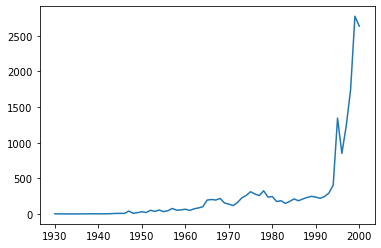

In [489]:
# plot the number of UFO reports per year (line plot is the default)
ufo.Year.value_counts().sort_index().plot()

## 10. Find and remove duplicate rows

In [493]:
# read a dataset of movie reviewers into a DataFrame
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('./data-basics/movie.user', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [ ]:
users.shape

In [494]:
# detect duplicate zip codes: True if an item is identical to a previous item
users.zip_code.duplicated().tail()

user_id
939    False
940     True
941    False
942    False
943    False
Name: zip_code, dtype: bool

In [495]:
# count the duplicate items (True becomes 1, False becomes 0)
users.zip_code.duplicated().sum()

148

In [496]:
# detect duplicate DataFrame rows: True if an entire row is identical to a previous row
users.duplicated().tail()

user_id
939    False
940    False
941    False
942    False
943    False
dtype: bool

In [497]:
# count the duplicate rows
users.duplicated().sum()

7

Logic for [**`duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html):

- **`keep='first'`** (default): Mark duplicates as True except for the first occurrence.
- **`keep='last'`**: Mark duplicates as True except for the last occurrence.
- **`keep=False`**: Mark all duplicates as True.

In [498]:
# examine the duplicate rows (ignoring the first occurrence)
users.loc[users.duplicated(keep='first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [499]:
# examine the duplicate rows (ignoring the last occurrence)
users.loc[users.duplicated(keep='last'), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [500]:
# examine the duplicate rows (including all duplicates)
users.loc[users.duplicated(keep=False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [501]:
# drop the duplicate rows (inplace=False by default)
users.drop_duplicates(keep='first').shape

(936, 4)

In [502]:
users.drop_duplicates(keep='last').shape

(936, 4)

In [503]:
users.drop_duplicates(keep=False).shape

(929, 4)

Documentation for [**`drop_duplicates`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [504]:
# only consider a subset of columns when identifying duplicates
users.duplicated(subset=['age', 'zip_code']).sum()

16

In [505]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

(927, 4)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 11. Avoid a SettingWithCopyWarning

In [ ]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('imdb_1000.csv')
movies.head()

In [ ]:
# count the missing values in the 'content_rating' Series
movies.content_rating.isnull().sum()

In [ ]:
# examine the DataFrame rows that contain those missing values
movies[movies.content_rating.isnull()]

In [ ]:
# examine the unique values in the 'content_rating' Series
movies.content_rating.value_counts()

**Goal:** Mark the 'NOT RATED' values as missing values, represented by 'NaN'.

In [ ]:
# first, locate the relevant rows
movies[movies.content_rating=='NOT RATED'].head()

In [ ]:
# then, select the 'content_rating' Series from those rows
movies[movies.content_rating=='NOT RATED'].content_rating.head()

In [ ]:
# finally, replace the 'NOT RATED' values with 'NaN' (imported from NumPy)
import numpy as np

movies[movies.content_rating=='NOT RATED'].content_rating = np.nan

**Problem:** That statement involves two operations, a **`__getitem__`** and a **`__setitem__`**. pandas can't guarantee whether the **`__getitem__`** operation returns a view or a copy of the data.

- If **`__getitem__`** returns a view of the data, **`__setitem__`** will affect the 'movies' DataFrame.
- But if **`__getitem__`** returns a copy of the data, **`__setitem__`** will not affect the 'movies' DataFrame.

In [ ]:
# the 'content_rating' Series has not changed
movies.content_rating.isnull().sum()

**Solution:** Use the **`loc`** method, which replaces the 'NOT RATED' values in a single **`__setitem__`** operation.

In [ ]:
# replace the 'NOT RATED' values with 'NaN' (does not cause a SettingWithCopyWarning)
movies.loc[movies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [ ]:
# this time, the 'content_rating' Series has changed
movies.content_rating.isnull().sum()

**Summary:** Use the **`loc`** method any time you are selecting rows and columns in the same statement.

**More information:** [Modern Pandas (Part 1)](http://tomaugspurger.github.io/modern-1.html)

In [ ]:
# create a DataFrame only containing movies with a high 'star_rating'
top_movies = movies.loc[movies.star_rating >= 9, :]
top_movies

**Goal:** Fix the 'duration' for 'The Shawshank Redemption'.

In [ ]:
# overwrite the relevant cell with the correct duration
top_movies.loc[0, 'duration'] = 150

**Problem:** pandas isn't sure whether 'top_movies' is a view or a copy of 'movies'.

In [ ]:
# 'top_movies' DataFrame has been updated
top_movies

In [ ]:
# 'movies' DataFrame has not been updated
movies.head(1)

**Solution:** Any time you are attempting to create a DataFrame copy, use the [**`copy`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html) method.

In [ ]:
# explicitly create a copy of 'movies'
top_movies = movies.loc[movies.star_rating >= 9, :].copy()

In [ ]:
# pandas now knows that you are updating a copy instead of a view (does not cause a SettingWithCopyWarning)
top_movies.loc[0, 'duration'] = 150

In [ ]:
# 'top_movies' DataFrame has been updated
top_movies

Documentation on indexing and selection: [Returning a view versus a copy](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy)

Stack Overflow: [What is the point of views in pandas if it is undefined whether an indexing operation returns a view or a copy?](http://stackoverflow.com/questions/34884536/what-is-the-point-of-views-in-pandas-if-it-is-undefined-whether-an-indexing-oper)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 12. Change display options

In [ ]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('drinks.csv')

In [ ]:
# only 60 rows will be displayed when printing
drinks

In [ ]:
# check the current setting for the 'max_rows' option
pd.get_option('display.max_rows')

Documentation for [**`get_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_option.html)

In [ ]:
# overwrite the current setting so that all rows will be displayed
pd.set_option('display.max_rows', None)
drinks

In [ ]:
# reset the 'max_rows' option to its default
pd.reset_option('display.max_rows')

Documentation for [**`set_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html) and [**`reset_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.reset_option.html)

In [ ]:
# the 'max_columns' option is similar to 'max_rows'
pd.get_option('display.max_columns')

In [ ]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('titanic_train.csv')
train.head()

In [ ]:
# an ellipsis is displayed in the 'Name' cell of row 1 because of the 'max_colwidth' option
pd.get_option('display.max_colwidth')

In [ ]:
# overwrite the current setting so that more characters will be displayed
pd.set_option('display.max_colwidth', 1000)
train.head()

In [ ]:
# overwrite the 'precision' setting to display 2 digits after the decimal point of 'Fare'
pd.set_option('display.precision', 2)
train.head()

In [ ]:
# add two meaningless columns to the drinks DataFrame
drinks['x'] = drinks.wine_servings * 1000
drinks['y'] = drinks.total_litres_of_pure_alcohol * 1000
drinks.head()

In [ ]:
# use a Python format string to specify a comma as the thousands separator
pd.set_option('display.float_format', '{:,}'.format)
drinks.head()

In [ ]:
# 'y' was affected (but not 'x') because the 'float_format' option only affects floats (not ints)
drinks.dtypes

In [ ]:
# view the option descriptions (including the default and current values)
# pd.describe_option()

In [ ]:
# search for specific options by name
pd.describe_option('rows')

Documentation for [**`describe_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.describe_option.html)

[Options and Settings](http://pandas.pydata.org/pandas-docs/stable/options.html)

## 13. Apply a function to a Series or DataFrame

In [ ]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('titanic_train.csv')
train.head()

**Goal:** Map the existing values of a Series to a different set of values

**Method:** [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) (Series method)

In [ ]:
# map 'female' to 0 and 'male' to 1
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})
train.loc[0:4, ['Sex', 'Sex_num']]

**Goal:** Apply a function to each element in a Series

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) (Series method)

**Note:** **`map`** can be substituted for **`apply`** in many cases, but **`apply`** is more flexible and thus is recommended

In [ ]:
# calculate the length of each string in the 'Name' Series
train['Name_length'] = train.Name.apply(len)
train.loc[0:4, ['Name', 'Name_length']]

In [ ]:
# round up each element in the 'Fare' Series to the next integer
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)
train.loc[0:4, ['Fare', 'Fare_ceil']]

In [ ]:
# we want to extract the last name of each person
train.Name.head()

In [ ]:
# use a string method to split the 'Name' Series at commas (returns a Series of lists)
train.Name.str.split(',').head()

In [ ]:
# define a function that returns an element from a list based on position
def get_element(my_list, position):
    return my_list[position]

In [ ]:
# apply the 'get_element' function and pass 'position' as a keyword argument
train.Name.str.split(',').apply(get_element, position=0).head()

In [ ]:
# alternatively, use a lambda function
train.Name.str.split(',').apply(lambda x: x[0]).head()

**Goal:** Apply a function along either axis of a DataFrame

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) (DataFrame method)

In [ ]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('drinks.csv')
drinks.head()

In [ ]:
# select a subset of the DataFrame to work with
drinks.loc[:, 'beer_servings':'wine_servings'].head()

In [ ]:
# apply the 'max' function along axis 0 to calculate the maximum value in each column
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

In [ ]:
# apply the 'max' function along axis 1 to calculate the maximum value in each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1).head()

In [ ]:
# use 'np.argmax' to calculate which column has the maximum value for each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1).head()

**Goal:** Apply a function to every element in a DataFrame

**Method:** [**`applymap`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html) (DataFrame method)

In [ ]:
# convert every DataFrame element into a float
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float).head()

In [ ]:
# overwrite the existing DataFrame columns
drinks.loc[:, 'beer_servings':'wine_servings'] = drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)
drinks.head()

## 14. Apply multiple aggregations on a Series or DataFrame

In [ ]:
# example of a single aggregation function after a groupby
drinks.groupby('continent').beer_servings.mean()

In [ ]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['mean', 'min', 'max'])

In [ ]:
# new: apply the same aggregations to a Series
drinks.beer_servings.agg(['mean', 'min', 'max'])

In [ ]:
# new: apply the same aggregations to a DataFrame
drinks.agg(['mean', 'min', 'max'])

- [More information](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-aggregate)
- [Video: When should I use a "groupby" in pandas?](https://www.youtube.com/watch?v=qy0fDqoMJx8&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=14)

## 15. Use the MultiIndex

In [ ]:
stocks = pd.read_csv('data/stocks.csv')
stocks

In [ ]:
stocks.index

In [ ]:
stocks.groupby('Symbol').Close.mean()

### Series with MultiIndex

In [ ]:
ser = stocks.groupby(['Symbol', 'Date']).Close.mean()
ser

In [ ]:
ser.index

In [ ]:
ser.unstack()

In [ ]:
df = stocks.pivot_table(values='Close', index='Symbol', columns='Date')
df

### Selection from Series with MultiIndex

In [ ]:
ser

In [ ]:
ser.loc['AAPL']

In [ ]:
ser.loc['AAPL', '2016-10-03']

In [ ]:
ser.loc[:, '2016-10-03']

In [ ]:
df

In [ ]:
df.loc['AAPL']

In [ ]:
df.loc['AAPL', '2016-10-03']

In [ ]:
df.loc[:, '2016-10-03']

### DataFrame with MultiIndex

In [ ]:
stocks.set_index(['Symbol', 'Date'], inplace=True)
stocks

In [ ]:
stocks.index

In [ ]:
stocks.sort_index(inplace=True)
stocks

### Selection from DataFrame with MultiIndex

In [ ]:
stocks.loc['AAPL']

In [ ]:
stocks.loc[('AAPL', '2016-10-03'), :]

In [ ]:
stocks.loc[('AAPL', '2016-10-03'), 'Close']

In [ ]:
stocks.loc[['AAPL', 'MSFT'], :]

In [ ]:
stocks.loc[(['AAPL', 'MSFT'], '2016-10-03'), :]

In [ ]:
stocks.loc[(['AAPL', 'MSFT'], '2016-10-03'), 'Close']

In [ ]:
stocks.loc[('AAPL', ['2016-10-03', '2016-10-04']), 'Close']

In [ ]:
stocks.loc[(slice(None), ['2016-10-03', '2016-10-04']), :]

### Merging DataFrames with MultiIndexes

In [ ]:
close = pd.read_csv('data/stocks.csv', usecols=[0, 1, 3], index_col=['Symbol', 'Date']).sort_index()
close

In [ ]:
volume = pd.read_csv('data/stocks.csv', usecols=[0, 2, 3], index_col=['Symbol', 'Date']).sort_index()
volume

In [ ]:
both = pd.merge(close, volume, left_index=True, right_index=True)
both

In [ ]:
both.reset_index()

## 16. Merge DataFrames in pandas

### Selecting a Function

Taken from [Merging DataFrames with pandas](https://www.datacamp.com/courses/merging-dataframes-with-pandas?tap_a=5644-dce66f&tap_s=280411-a25fc8) (DataCamp course):

- `df1.append(df2)`: stacking vertically
- `pd.concat([df1, df2])`:
  - stacking many horizontally or vertically
  - simple inner/outer joins on Indexes
- `df1.join(df2)`: inner/outer/left/right joins on Indexes
- `pd.merge(df1, df2)`: many joins on multiple columns

### Joining (Merging) DataFrames

Using the [MovieLens 100k data](http://grouplens.org/datasets/movielens/), let's create two DataFrames:

- **movies**: shows information about movies, namely a unique **movie_id** and its **title**
- **ratings**: shows the **rating** that a particular **user_id** gave to a particular **movie_id** at a particular **timestamp**

In [ ]:
movie_cols = ['movie_id', 'title']
movies = pd.read_table('data/u.item', sep='|', header=None, names=movie_cols, usecols=[0, 1])
movies.head()

In [ ]:
movies.shape

In [ ]:
movies.movie_id.nunique()

In [ ]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/u.data', sep='\t', header=None, names=rating_cols)
ratings.head()

In [ ]:
ratings.shape

In [ ]:
ratings.movie_id.nunique()

In [ ]:
ratings.loc[ratings.movie_id == 1, :].head()

Let's pretend that you want to examine the ratings DataFrame, but you want to know the **title** of each movie rather than its **movie_id**. The best way to accomplish this objective is by "joining" (or "merging") the DataFrames using the Pandas `merge` function:

In [ ]:
movies.columns

In [ ]:
ratings.columns

In [ ]:
movie_ratings = pd.merge(movies, ratings)
movie_ratings.columns

In [ ]:
movie_ratings.head()

In [ ]:
movie_ratings.shape

Here's what just happened:

- Pandas noticed that movies and ratings had one column in common, namely **movie_id**. This is the "key" on which the DataFrames will be joined.
- The first **movie_id** in movies is 1. Thus, Pandas looked through every row in the ratings DataFrame, searching for a movie_id of 1. Every time it found such a row, it recorded the **user_id**, **rating**, and **timestamp** listed in that row. In this case, it found 452 matching rows.
- The second **movie_id** in movies is 2. Again, Pandas did a search of ratings and found 131 matching rows.
- This process was repeated for all of the remaining rows in movies.

At the end of the process, the movie_ratings DataFrame is created, which contains the two columns from movies (**movie_id** and **title**) and the three other colums from ratings (**user_id**, **rating**, and **timestamp**).

- **movie_id** 1 and its **title** are listed 452 times, next to the **user_id**, **rating**, and **timestamp** for each of the 452 matching ratings.
- **movie_id** 2 and its **title** are listed 131 times, next to the **user_id**, **rating**, and **timestamp** for each of the 131 matching ratings.
- And so on, for every movie in the dataset.

In [ ]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

Notice the shapes of the three DataFrames:

- There are 1682 rows in the movies DataFrame.
- There are 100000 rows in the ratings DataFrame.
- The `merge` function resulted in a movie_ratings DataFrame with 100000 rows, because every row from ratings matched a row from movies.
- The movie_ratings DataFrame has 5 columns, namely the 2 columns from movies, plus the 4 columns from ratings, minus the 1 column in common.

By default, the `merge` function joins the DataFrames using all column names that are in common (**movie_id**, in this case). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.merge.html) explains how you can override this behavior.

### What if...?

What if the columns you want to join on don't have the same name?

In [ ]:
movies.columns = ['m_id', 'title']
movies.columns

In [ ]:
ratings.columns

In [ ]:
pd.merge(movies, ratings, left_on='m_id', right_on='movie_id').head()

What if you want to join on one index?

In [ ]:
movies = movies.set_index('m_id')
movies.head()

In [ ]:
pd.merge(movies, ratings, left_index=True, right_on='movie_id').head()

What if you want to join on two indexes?

In [ ]:
ratings = ratings.set_index('movie_id')
ratings.head()

In [ ]:
pd.merge(movies, ratings, left_index=True, right_index=True).head()

### Four Types of Joins

There are actually four types of joins supported by the Pandas `merge` function. Here's how they are described by the documentation:

- **inner:** use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys
- **outer:** use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically
- **left:** use only keys from left frame, similar to a SQL left outer join; preserve key order
- **right:** use only keys from right frame, similar to a SQL right outer join; preserve key order

The default is the "inner join", which was used when creating the movie_ratings DataFrame.

It's easiest to understand the different types by looking at some simple examples:

In [ ]:
A = pd.DataFrame({'color': ['green', 'yellow', 'red'], 'num':[1, 2, 3]})
A

In [ ]:
B = pd.DataFrame({'color': ['green', 'yellow', 'pink'], 'size':['S', 'M', 'L']})
B

Inner join: Only include observations found in both A and B:

In [ ]:
pd.merge(A, B, how='inner')

Outer join: Include observations found in either A or B:

In [ ]:
pd.merge(A, B, how='outer')

Left join: Include all observations found in A:

In [ ]:
pd.merge(A, B, how='left')

Right join: Include all observations found in B:

In [ ]:
pd.merge(A, B, how='right')